#### 1

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties

R1 = uncertainties.ufloat(10000, 0.05*10000)
R2 = uncertainties.ufloat(82000, 0.05*82000)
Cf = uncertainties.ufloat(10**(-12), 0.05*10**(-12))
G2 = R2/R1/Cf
print("Gain = ", G2, "F^-1")


Gain =  (8.2+/-0.7)e+12 F^-1


#### 2

In [165]:
G1 = uncertainties.ufloat(0.264, 0.001)
E_alpha = uncertainties.ufloat(5.486, 0.001)
#conversion factor from MeV to J
Vpp = G1*G2*E_alpha*1.60218*10**(-13)
print("Vpp = ", Vpp, "V")

Vpp =  1.90+/-0.16 V


#### 3

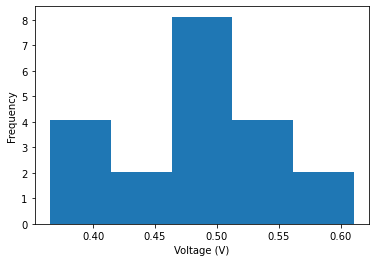

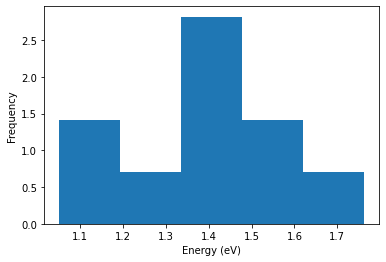

In [166]:

t = np.array([485,531,476,496,509,518,435,394,365,611])*10**(-3)
#normalized histogram
plt.hist(t, bins=5, density=True)
plt.xlabel("Voltage (V)")
plt.ylabel("Frequency")
plt.show()
tMeV = np.array(t)/G1.n/G2.n/1.60218/10**(-13)
plt.hist(tMeV, bins=5, density=True)
plt.xlabel("Energy (eV)")
plt.ylabel("Frequency")
plt.show()


#### 9


7727
mu =  1.9222636475631667 sigma =  -0.1284359546385518
chi2 =  3743.8793890861607


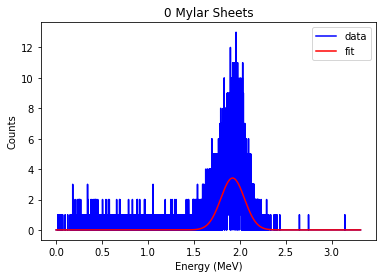

7928
mu =  1.698782159701982 sigma =  0.14390405173958057
chi2 =  3786.9678106153233


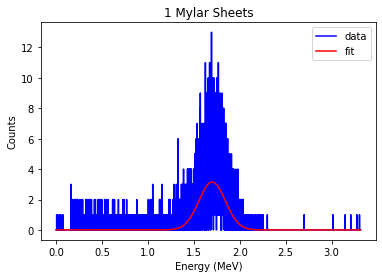

8071
mu =  1.4777832061194442 sigma =  0.16907299382293095
chi2 =  3856.2540215841036


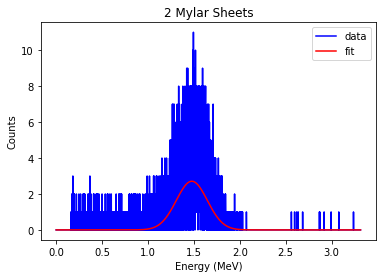

8109
mu =  1.2268886119579534 sigma =  0.18837918698794695
chi2 =  3880.7969621637762


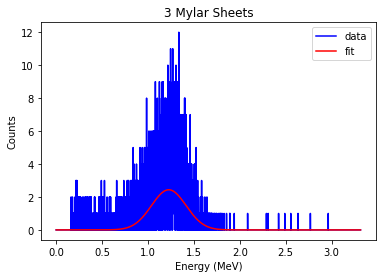

8519
mu =  0.9037528379651327 sigma =  0.24330095891925724
chi2 =  3972.170901623638


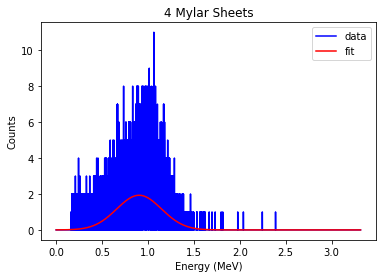

7467
mu =  0.5758703334477855 sigma =  0.2443399693603889
chi2 =  3440.9853650209925


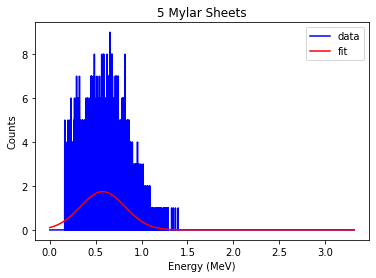

3807
mu =  0.34045458943669077 sigma =  0.1522621386292039
chi2 =  2211.851280053716


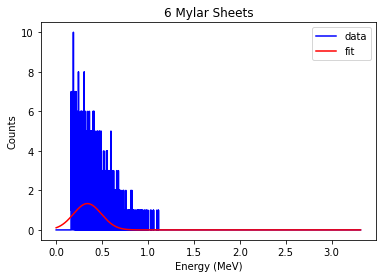

0
N = 0
mu =  2.046543862667513 sigma =  -0.3672645354778371
chi2 =  419.9999998708739


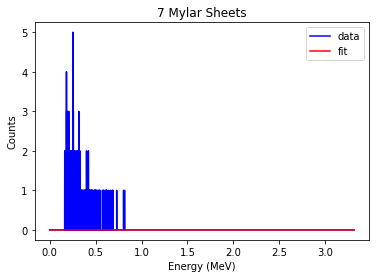

0
N = 0
mu =  1.9732725999475864 sigma =  -0.41918614550237493
chi2 =  14.000000000594405


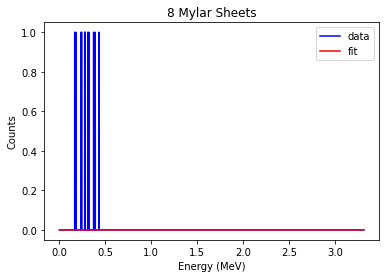

0
N = 0
mu =  1.9966871828863262 sigma =  0.02033215411219938
chi2 =  1.0


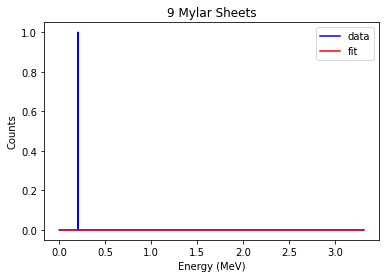

0
N = 0
mu =  1.0000000000025784 sigma =  0.499999999959751
chi2 =  7.070991855450729e-35


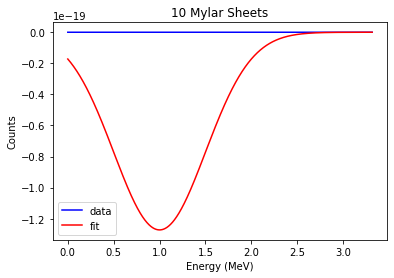

In [167]:
import pandas as pd
from scipy.optimize import curve_fit
def gauss(x,A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

#read in the data files in the data folder with a name like XX_Mylar.csv
#where XX is the number of the data file
#and Mylar is the material used
folderName = "data/"
fileName = "_Mylar.csv"
nums = ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10"]
mus = []
numSheets = []
sigmaMu = []
p0s = [[10, 2, 0.2],[10, 1.7, 0.2],[10, 1.5, 0.2],[10, 1.25, 0.2],[10, 1, 0.2],[10, 0.75, 0.2],[10, 0.5, 0.2],[10, 0.25, 0.2],[10, 0.3, 1],[10, 0.1, 0.2],[10, 0, 0.2]]
for num in nums:
    Sheets = int(num)
    num = folderName + num + fileName
    data = pd.read_csv(num, skiprows=7)
    data = data.to_numpy()
    binToEnergy = (1.15/16384)/float(G2.nominal_value*G1.nominal_value)/1.60218/10**(-13)
    x = data[:,0]*binToEnergy
    y = data[:,1]
    uncertainty = np.sqrt(y)
    for i in range(len(y)):
        if y[i] == 0:
            uncertainty[i] = 1
    plt.plot(x, y, 'b', label='data')
    
    #fit the data to a gaussian
    try:
        popt, pcov = curve_fit(gauss, x, y, p0=[10, 1, 0.5], sigma=uncertainty)
        plt.plot(x, gauss(x, *popt), 'r-', label='fit')
        mus.append(popt[1])
        numSheets.append(Sheets)
        #N is the number of counts inside the gaussian
        xlow = (popt[1] - 3*np.abs(popt[2]))/binToEnergy
        xhigh = (popt[1] + np.abs(3*popt[2]))/binToEnergy
        if(xlow < 0):
            xlow = 0
        if(xhigh > 16384):
            xhigh = 16384
        N = np.sum(y[round(xlow):round(xhigh)])
        print(N)
        if(N==0):
            sigmaMu.append(1)
            print("N = 0")
        else:
            sigmaMu.append(popt[2]/np.sqrt(N))
        #print the fit parameters
        print("mu = ", popt[1], "sigma = ", popt[2])
        #print the goodness of fit
        print("chi2 = ", np.sum((gauss(x, *popt)-y)**2/uncertainty**2))
    except:
        print("Fit failed not enough data")
    #plot the data and the fit
    
    plt.legend()
    plt.xlabel("Energy (MeV)")
    plt.ylabel("Counts")
    plt.title(str(Sheets)+" Mylar Sheets")
    plt.show()


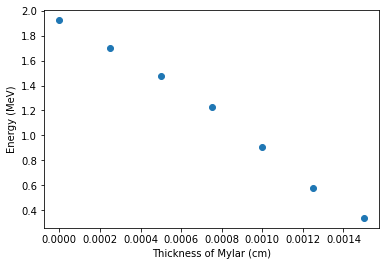

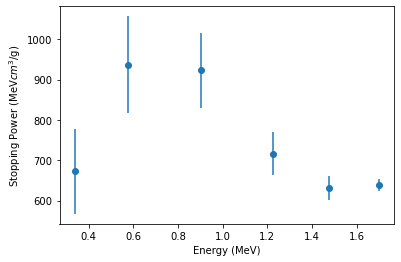

In [168]:
#remove last element in mus
mus = mus[0:7]
mus = np.array(mus)
numSheets = np.array(numSheets)
numSheets = numSheets[0:7]
thickness = numSheets*2.5*10**(-4)
sigmaMu = sigmaMu[0:7]
plt.errorbar(thickness, mus, yerr=sigmaMu, fmt='o', label='data')
plt.xlabel("Thickness of Mylar (cm)")
plt.ylabel("Energy (MeV)")
plt.show()
muWithErr = []
thicknessWithErr = []
thickErr = []
for i in range(len(thickness)):
    thicknessWithErr.append(uncertainties.ufloat(thickness[i], 0.000005*numSheets[i]))
    thickErr.append(0.000005*numSheets[i])
    muWithErr.append(uncertainties.ufloat(mus[i], abs(sigmaMu[i])))

SErr = []
S = []
for i in range(len(mus)-1):
    err = (muWithErr[i+1]-muWithErr[i])/(thicknessWithErr[i+1]-thicknessWithErr[i])/1.4
    SErr.append(err.std_dev)
    S.append(-(mus[i+1]-mus[i])/(thickness[i+1]-thickness[i])/1.4)
plt.errorbar(mus[1:], S, yerr=SErr, xerr = sigmaMu[1:], fmt='o', label='data')
plt.xlabel("Energy (MeV)")
plt.ylabel("Stopping Power (MeV$cm^3$/g)")
plt.show()



Text(0, 0.5, 'Stopping Power (MeV$cm^3$/g)')

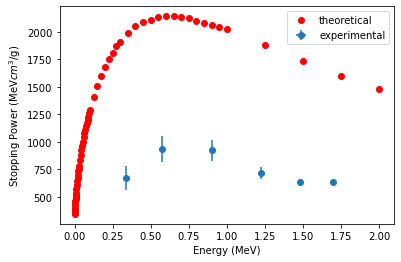

In [169]:
theoreticalData = pd.read_csv("Alpha_mass_stopping_power.csv", skiprows=0, delimiter='\t')
theoreticalData = theoreticalData.to_numpy()
energy = theoreticalData[:,0]
mylarStopping = theoreticalData[:,2]
plt.plot(energy[0:60], mylarStopping[0:60], 'ro', label='theoretical')
plt.errorbar(mus[1:], S, yerr=SErr, xerr = sigmaMu[1:], fmt='o', label='experimental')
plt.legend()
plt.xlabel("Energy (MeV)")
plt.ylabel("Stopping Power (MeV$cm^3$/g)")